In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error

In [4]:
!python --version

Python 3.12.3


In [3]:
import pickle

In [6]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')

In [17]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0 days 00:00:07
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0 days 00:00:02
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,0 days 00:19:46
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,0 days 02:01:12
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0 days 00:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0,0 days 00:09:27
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0,0 days 00:35:02
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,...,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0,0 days 00:00:40
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,...,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0,0 days 00:00:03


In [11]:
df['trip_type'].value_counts()

trip_type
1.0    39233
2.0     1238
Name: count, dtype: int64

In [14]:
df = df[df.trip_type == 2]

In [16]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

/tmp/ipykernel_6007/3059950210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime


In [19]:
df['duration'] = df.duration.apply(lambda td : td.total_seconds() / 60)

/tmp/ipykernel_6007/885661016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df.duration.apply(lambda td : td.total_seconds() / 60)


In [22]:
df.duration.describe()

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
25%         0.100000
50%         1.666667
75%        14.216667
max      1416.100000
Name: duration, dtype: float64

In [23]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [24]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [25]:
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_6007/1767203464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [36]:
print(df[numerical].dtypes)
print()
print(df[categorical].dtypes)


trip_distance    float64
dtype: object

PULocationID    object
DOLocationID    object
dtype: object


In [ ]:
dv = DictVectorizer

In [38]:
train_dicts = df[categorical + numerical].to_dict(orient = 'records')

In [40]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [41]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1920 stored elements and shape (640, 236)>

In [52]:
target = 'duration'
y_train = df[target].values

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_6007/1500500840.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'prediction')
/tmp/ipykernel_6007/1500500840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label = 'actual')


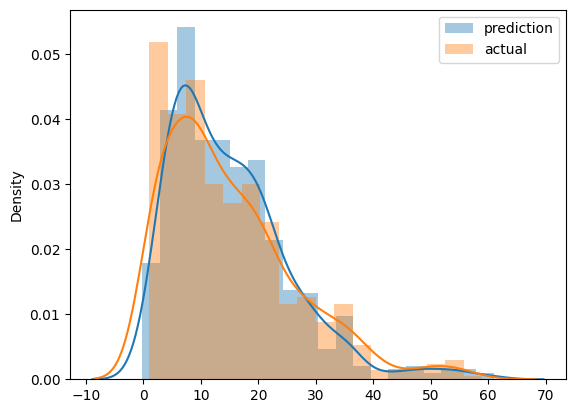

In [59]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()
plt.show()

In [62]:
root_mean_squared_error(y_train, y_pred)

4.803126149499836

In [63]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [64]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet')

In [65]:
len(df_train), len(df_val)

(73908, 61921)

In [66]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [67]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [68]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

7.758715208009878

In [73]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)